In [1]:
# MNQ Range Program 

#by Wolfrank Guzman GitHub: @guzmanwolfrank

In [2]:
# The goal of this program is to calculate the first 45 min Open Range on MNQ Futures along with the Day Range and Day Change.  

# By creating this dataframe, we can use it to analyze correlations between positive and negative days and their prospective ranges, and the change in these price swings and ranges. 
# We can later apply machine learning predictive models to the data and later backtest, deploy live and see if the correlations and projections hold true. 



In [3]:
## Data Dictionary

# ABSDayChange:  This column shows the absolute value of the Day's Change which is the Close - Open.  </br>
# DayChange:  The positive or negative value of the Day's change which is the Close - Open. 	</br>
# OpenOnlyRange:  This column shows the value of the min and max value in the first 45 minutes of the Market Open at 9:30.  We are using Equities, not Futures open. 	</br>
# DayRange:  This value contains the distance from the Day's High to Low or vice versa. </br>

In [4]:
import os
print (os.path.abspath("testfile.ext"))


C:\Users\Wolfrank\AppData\Local\Programs\Microsoft VS Code\testfile.ext


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Average Open Range: 108.72
Rolling Averages for ABSDayChange:
 - 5-day Average: 136.45
 - 10-day Average: 164.03
 - 20-day Average: 144.94
 - 30-day Average: 136.28
 - 40-day Average: 127.83
 - 50-day Average: 126.29

Rolling Averages for OpenOnlyRange:
 - 5-day Average: 167.65
 - 10-day Average: 143.12
 - 20-day Average: 117.41
 - 30-day Average: 117.86
 - 40-day Average: 109.29
 - 50-day Average: 108.72

Rolling Averages for DayRange:
 - 5-day Average: 237.80
 - 10-day Average: 285.55
 - 20-day Average: 265.68
 - 30-day Average: 254.31
 - 40-day Average: 250.77
 - 50-day Average: 254.97



,Open,High,Low,Close,Adj Close,Volume,ABSDayChange,DayChange,OpenOnlyRange,DayRange
Date,,,,,,,,,,
2024-01-05,16454.00,16577.00,16334.25,16460.25,16460.25,1098485,6.25,6.25,113.25,242.75
2024-01-08,16472.25,16811.50,16378.25,16803.75,16803.75,880010,331.50,331.50,139.00,433.25
2024-01-09,16790.00,16868.50,16658.50,16830.25,16830.25,1023133,40.25,40.25,86.00,210.00
2024-01-10,16829.50,16983.25,16801.75,16945.25,16945.25,986991,115.75,115.75,38.00,181.50
2024-01-11,16955.50,17056.00,16753.00,16966.25,16966.25,1370416,10.75,10.75,212.50,303.00
2024-01-12,16958.00,17042.50,16866.25,16969.25,16969.25,1136604,11.25,11.25,103.75,176.25
2024-01-16,16962.00,17034.00,16812.00,16966.50,16966.50,1590564,4.50,4.50,133.50,222.00
2024-01-17,16979.50,16981.25,16689.00,16869.75,16869.75,1232753,109.75,-109.75,126.25,292.25
2024-01-18,16859.50,17126.00,16833.75,17110.00,17110.00,1383841,250.50,250.50,59.25,292.25


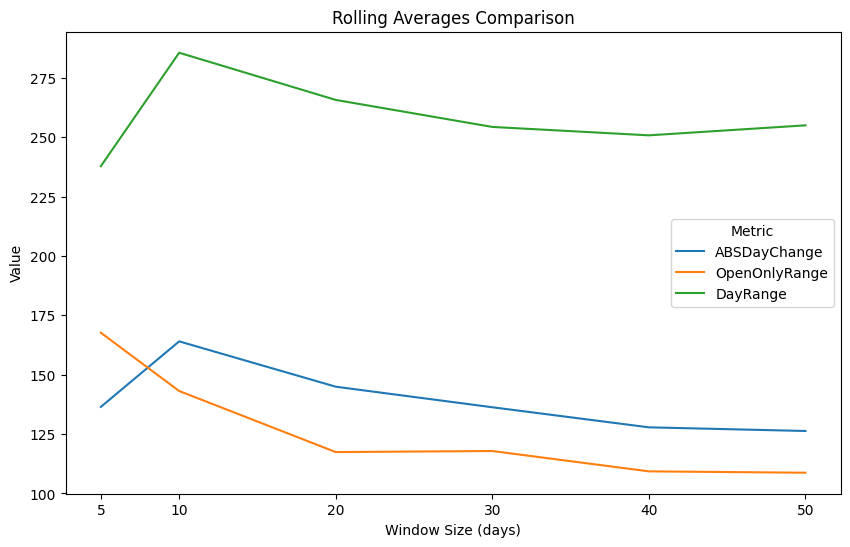

,ABSDayChange,OpenOnlyRange,DayRange
5,136.450000,167.650000,237.800000
10,164.025000,143.125000,285.550000
20,144.937500,117.412500,265.675000
30,136.283333,117.858333,254.308333
40,127.831250,109.293750,250.768750
50,126.290000,108.720000,254.975000


,Open,High,Low,Close,Adj Close,Volume,ABSDayChange,DayChange,OpenOnlyRange,DayRange,OpenOnly_as_PCT_of_DayRange
Date,,,,,,,,,,,
2024-01-05,16454.00,16577.00,16334.25,16460.25,16460.25,1098485,6.25,6.25,113.25,242.75,0.466529
2024-01-08,16472.25,16811.50,16378.25,16803.75,16803.75,880010,331.50,331.50,139.00,433.25,0.320831
2024-01-09,16790.00,16868.50,16658.50,16830.25,16830.25,1023133,40.25,40.25,86.00,210.00,0.409524
2024-01-10,16829.50,16983.25,16801.75,16945.25,16945.25,986991,115.75,115.75,38.00,181.50,0.209366
2024-01-11,16955.50,17056.00,16753.00,16966.25,16966.25,1370416,10.75,10.75,212.50,303.00,0.701320
2024-01-12,16958.00,17042.50,16866.25,16969.25,16969.25,1136604,11.25,11.25,103.75,176.25,0.588652
2024-01-16,16962.00,17034.00,16812.00,16966.50,16966.50,1590564,4.50,4.50,133.50,222.00,0.601351
2024-01-17,16979.50,16981.25,16689.00,16869.75,16869.75,1232753,109.75,-109.75,126.25,292.25,0.431993
2024-01-18,16859.50,17126.00,16833.75,17110.00,17110.00,1383841,250.50,250.50,59.25,292.25,0.202737


Number of instances where 'OpenOnly_as_PCT_of_DayRange' is greater than 35%: 33
Number of instances where 'OpenOnly_as_PCT_of_DayRange' is greater than 50%: 17
Number of instances where 'OpenOnly_as_PCT_of_DayRange' is greater than 70%: 5
Total number of instances in the DataFrame: 50


In [5]:
import yfinance as yf
import pandas as pd
import warnings 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import datetime

# Ignore all warnings
warnings.filterwarnings('ignore')


# Set the ticker symbol 
ticker_symbol = "MNQ=F"
# Fetch intraday data using yfinance for the last 60 days with 15-minute intervals
data = yf.download(ticker_symbol, period="60d", interval="15m").round(2)



# Round numbers
data = data.round(2)
#display(data)
# Convert the index to datetime format
data.index = pd.to_datetime(data.index)

# Filter rows for the specific times 09:30 and 10:15
filtered_data = data[(data.index.time == pd.to_datetime("09:30:00").time()) | (data.index.time == pd.to_datetime("10:15:00").time())]
#display(filtered_data)

# Group by date and aggregate the data
combined_data = filtered_data.groupby(filtered_data.index.date).agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'})

# Calculate the range and add it as a new column
combined_data['Range'] = combined_data['High'] - combined_data['Low']

# Round numbers
data = data.round(2)
cdata = combined_data.round(2)
#display(cdata)

# Calculate the average range for different windows of days
windows = [5, 10, 20, 30, 40, 50, 60]
for window in windows:
    avg_range = combined_data['Range'].rolling(window=window).mean().iloc[-1].round(2)
   # print(f"Average Opening Range for last {window} days:", avg_range)

# Calculate the average of the 'Range' column
average_range = combined_data['Range'].mean()

Ddata = yf.download(ticker_symbol, period="60d", interval="1d").round(2)
Ddata['ABSDayChange']= abs(Ddata['Close']- Ddata['Open'])
Ddata['DayChange']= (Ddata['Close']- Ddata['Open'])
Ddata['OpenOnlyRange']= combined_data['Range']
Ddata['DayRange']= Ddata['High']-Ddata['Low']

# Calculate absolute day change
Ddata['ABSDayChange'] = abs(Ddata['Close'] - Ddata['Open'])

# Calculate day change
Ddata['DayChange'] = Ddata['Close'] - Ddata['Open']

# Calculate OpenOnlyRange
Ddata['OpenOnlyRange'] = combined_data['Range']

# Calculate DayRange
Ddata['DayRange'] = Ddata['High'] - Ddata['Low']

# Define the window sizes
windows = [5, 10, 20, 30, 40, 50]


print("Average Open Range:", average_range)


# Calculate rolling averages for each column and window size
for column in ['ABSDayChange', 'OpenOnlyRange', 'DayRange']:
    print(f"Rolling Averages for {column}:")
    for window in windows:
        rolling_avg = Ddata[column].rolling(window=window).mean().iloc[-1]
        print(f" - {window}-day Average: {rolling_avg:.2f}")
    print()
    

display(Ddata)

# Define the window sizes
windows = [5, 10, 20, 30, 40, 50]

# Calculate rolling averages for each column and window size
rolling_avgs = {}
for column in ['ABSDayChange', 'OpenOnlyRange', 'DayRange']:
    rolling_avgs[column] = {}
    for window in windows:
        rolling_avg = Ddata[column].rolling(window=window).mean().iloc[-1]
        rolling_avgs[column][window] = rolling_avg

# Create a DataFrame for rolling averages
rolling_avg_df = pd.DataFrame(rolling_avgs)

# Plot line chart comparing the rolling averages
plt.figure(figsize=(10, 6))
sns.lineplot(data=rolling_avg_df, dashes=False)
plt.title('Rolling Averages Comparison')
plt.xlabel('Window Size (days)')
plt.ylabel('Value')
plt.legend(title='Metric')
plt.xticks(windows)
plt.show()


display(rolling_avg_df)
#New Questions:  What percentage of the day range is the open only range?  

#To answer this question we must make a new column, OpenOnly_as_PCT_of_DayRange
Ddata['OpenOnly_as_PCT_of_DayRange']= Ddata['OpenOnlyRange']/Ddata['DayRange']
PCT_of = Ddata['OpenOnly_as_PCT_of_DayRange']

display(Ddata)

# Count instances where 'OpenOnly_as_PCT_of_DayRange' is greater than 35%
count_greater_than_35 = (Ddata['OpenOnly_as_PCT_of_DayRange'] > 0.35).sum()

# Count instances where 'OpenOnly_as_PCT_of_DayRange' is greater than 50%
count_greater_than_50 = (Ddata['OpenOnly_as_PCT_of_DayRange'] > 0.50).sum()

# Count instances where 'OpenOnly_as_PCT_of_DayRange' is greater than 70%
count_greater_than_70 = (Ddata['OpenOnly_as_PCT_of_DayRange'] > 0.70).sum()

print("Number of instances where 'OpenOnly_as_PCT_of_DayRange' is greater than 35%:", count_greater_than_35)
print("Number of instances where 'OpenOnly_as_PCT_of_DayRange' is greater than 50%:", count_greater_than_50)
print("Number of instances where 'OpenOnly_as_PCT_of_DayRange' is greater than 70%:", count_greater_than_70)


# Calculate the total number of instances in the DataFrame Ddata
total_instances = len(Ddata)

print("Total number of instances in the DataFrame:", total_instances)


In [6]:
import yfinance as yf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import datetime

# Download historical data for MNQ
ticker = "MNQ=F"  # Ticker symbol for Micro E-mini NASDAQ-100 Futures
start_date = datetime.datetime.now() - datetime.timedelta(days=365)  # One year of historical data
end_date = datetime.datetime.now()

data = yf.download(ticker, start=start_date, end=end_date)

# Preprocess data
data = data.dropna()  # Remove any rows with missing values
data['Date'] = data.index  # Convert index to a column
data['Date'] = data['Date'].apply(lambda x: x.toordinal())  # Convert dates to ordinal values

# Define features (predictors) and target (closing prices)
X = data[['Date']].values
y = data['Close'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions for the next ten days
next_ten_days = np.arange(max(X), max(X) + 11).reshape(-1, 1)
predicted_prices = model.predict(next_ten_days).round(2)

# Convert ordinal dates back to datetime objects
next_ten_dates = [datetime.date.fromordinal(int(date)) for date in next_ten_days.flatten()]

# Print the predicted closing prices with corresponding dates for the next ten days
print("Predicted closing prices for the next ten days:")
for i in range(len(predicted_prices)):
    print(f"{next_ten_dates[i]}: {predicted_prices[i]}")


[*********************100%***********************]  1 of 1 completed
Predicted closing prices for the next ten days:
2024-03-15: 17769.46
2024-03-16: 17782.42
2024-03-17: 17795.38
2024-03-18: 17808.34
2024-03-19: 17821.3
2024-03-20: 17834.25
2024-03-21: 17847.21
2024-03-22: 17860.17
2024-03-23: 17873.13
2024-03-24: 17886.09
2024-03-25: 17899.05


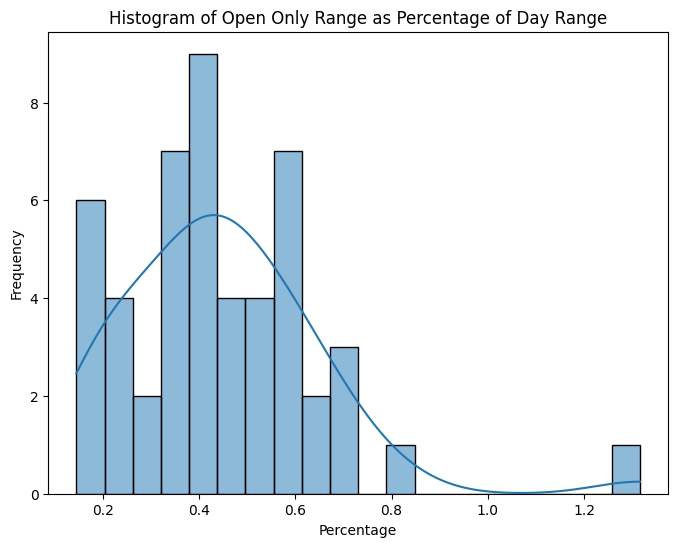

In [7]:
plt.figure(figsize=(8, 6))
sns.histplot(data=Ddata, x='OpenOnly_as_PCT_of_DayRange', bins=20, kde=True)
plt.title('Histogram of Open Only Range as Percentage of Day Range')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.show()


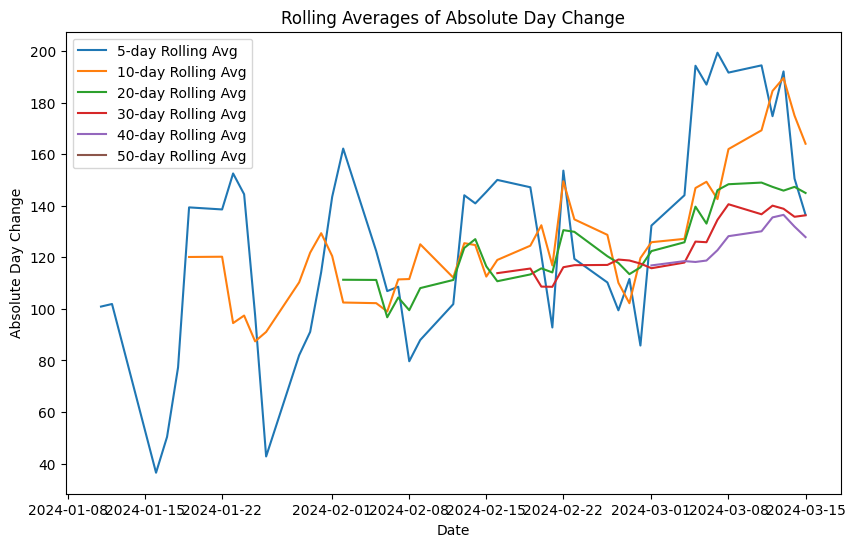

In [8]:
plt.figure(figsize=(10, 6))
for window in windows:
    sns.lineplot(data=Ddata['ABSDayChange'].rolling(window=window).mean(), label=f'{window}-day Rolling Avg')
plt.title('Rolling Averages of Absolute Day Change')
plt.xlabel('Date')
plt.ylabel('Absolute Day Change')
plt.legend()
plt.show()


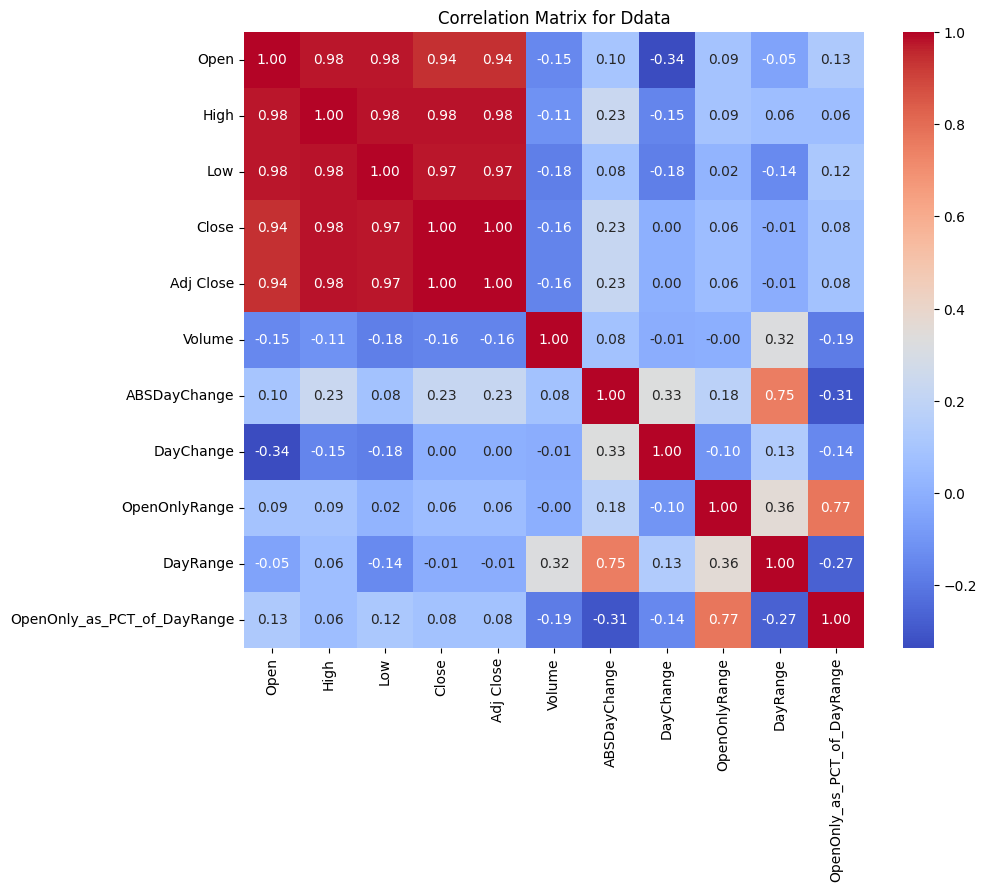

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(Ddata.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Ddata')
plt.show()


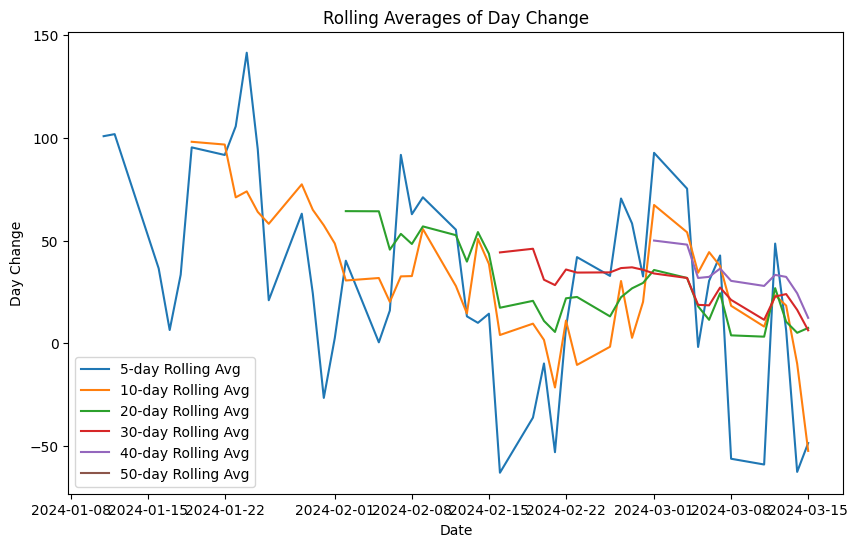

In [10]:
plt.figure(figsize=(10, 6))
for window in windows:
    sns.lineplot(data=Ddata['DayChange'].rolling(window=window).mean(), label=f'{window}-day Rolling Avg')
plt.title('Rolling Averages of Day Change')
plt.xlabel('Date')
plt.ylabel('Day Change')
plt.legend()
plt.show()


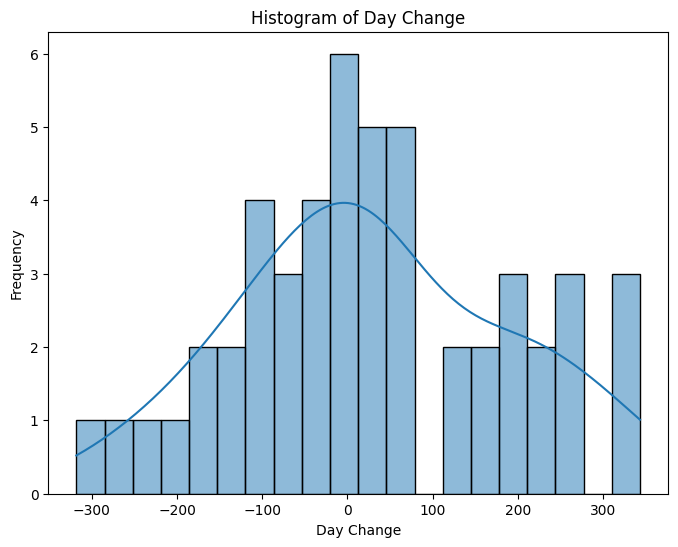

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(data=Ddata, x='DayChange', bins=20, kde=True)
plt.title('Histogram of Day Change')
plt.xlabel('Day Change')
plt.ylabel('Frequency')
plt.show()


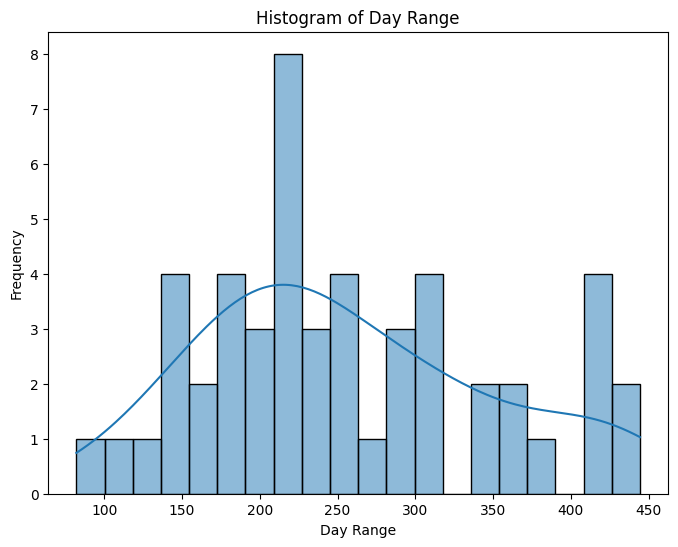

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(data=Ddata, x='DayRange', bins=20, kde=True)
plt.title('Histogram of Day Range')
plt.xlabel('Day Range')
plt.ylabel('Frequency')
plt.show()


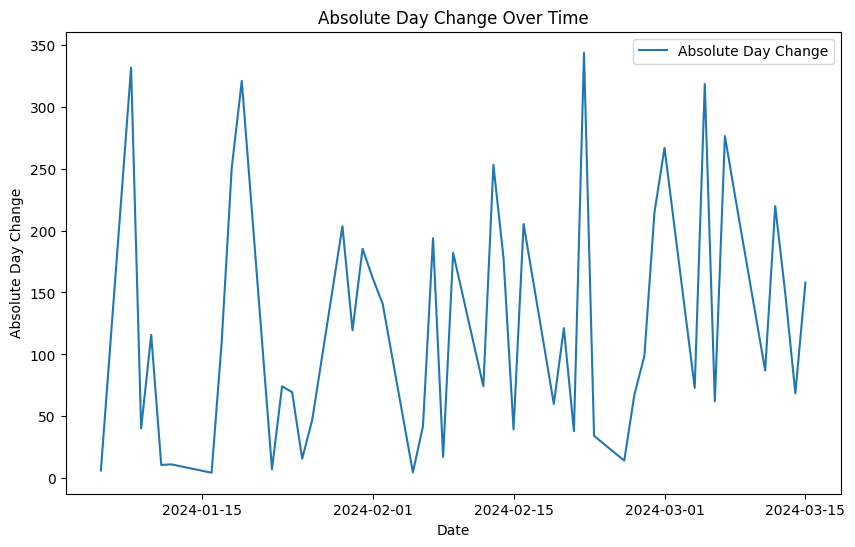

In [13]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=Ddata['ABSDayChange'], label='Absolute Day Change')
plt.title('Absolute Day Change Over Time')
plt.xlabel('Date')
plt.ylabel('Absolute Day Change')
plt.legend()
plt.show()


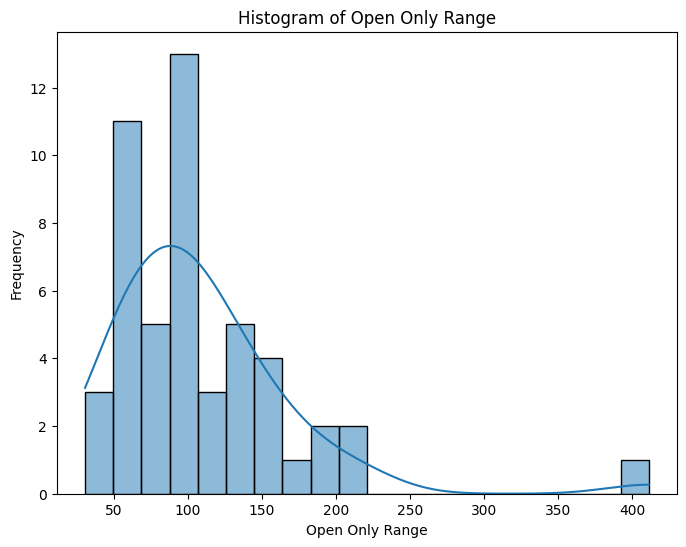

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(data=Ddata, x='OpenOnlyRange', bins=20, kde=True)
plt.title('Histogram of Open Only Range')
plt.xlabel('Open Only Range')
plt.ylabel('Frequency')
plt.show()


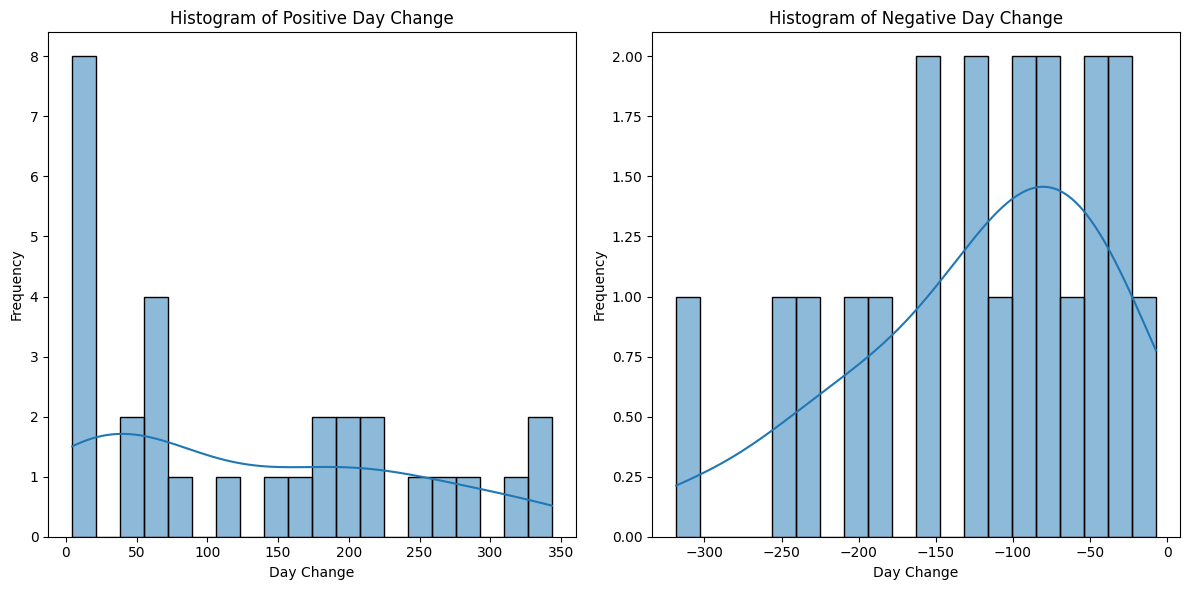

In [15]:
# Filter data for positive and negative DayChange
positive_changes = Ddata[Ddata['DayChange'] > 0]
negative_changes = Ddata[Ddata['DayChange'] < 0]

# Create subplots for positive and negative changes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for positive changes
sns.histplot(data=positive_changes, x='DayChange', bins=20, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Positive Day Change')
axes[0].set_xlabel('Day Change')
axes[0].set_ylabel('Frequency')

# Plot for negative changes
sns.histplot(data=negative_changes, x='DayChange', bins=20, kde=True, ax=axes[1])
axes[1].set_title('Histogram of Negative Day Change')
axes[1].set_xlabel('Day Change')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


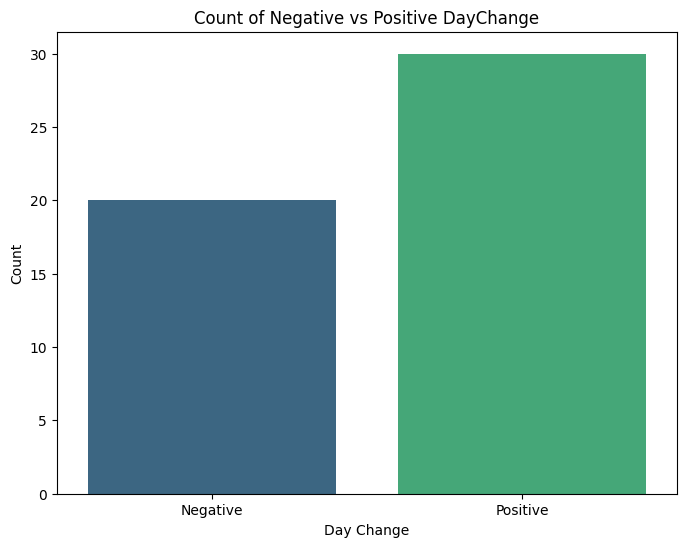

In [16]:
# Count negative and positive DayChange instances
negative_count = (Ddata['DayChange'] < 0).sum()
positive_count = (Ddata['DayChange'] > 0).sum()

# Create a DataFrame for counts
count_df = pd.DataFrame({'DayChange': ['Negative', 'Positive'], 'Count': [negative_count, positive_count]})

# Plot count of negative and positive DayChange values
plt.figure(figsize=(8, 6))
sns.barplot(data=count_df, x='DayChange', y='Count', palette='viridis')
plt.title('Count of Negative vs Positive DayChange')
plt.xlabel('Day Change')
plt.ylabel('Count')
plt.show()


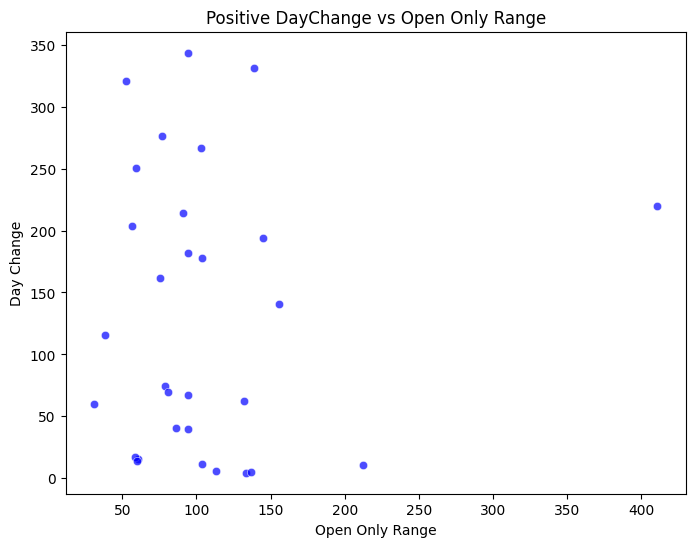

In [17]:
# Filter data for positive DayChange
positive_changes = Ddata[Ddata['DayChange'] > 0]

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=positive_changes, x='OpenOnlyRange', y='DayChange', color='blue', alpha=0.7)
plt.title('Positive DayChange vs Open Only Range')
plt.xlabel('Open Only Range')
plt.ylabel('Day Change')
plt.show()


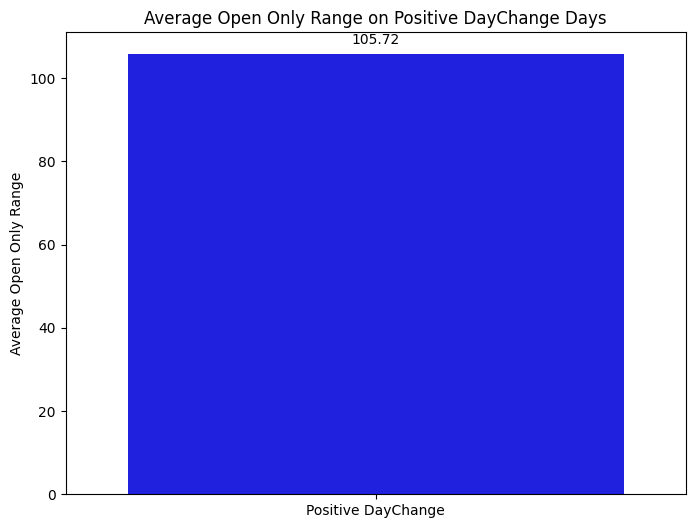

In [18]:
# Filter data for positive DayChange
positive_changes = Ddata[Ddata['DayChange'] > 0]

# Calculate the average Open Only Range for positive DayChange days
average_open_only_range = positive_changes['OpenOnlyRange'].mean()

# Create bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=['Positive DayChange'], y=[average_open_only_range], color='blue')
plt.title('Average Open Only Range on Positive DayChange Days')
plt.ylabel('Average Open Only Range')

# Annotate the bar plot with the value
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


In [19]:
# Filter data for positive DayChange and Open Only Range > 105
positive_high_open_range = Ddata[(Ddata['DayChange'] > 0) & (Ddata['OpenOnlyRange'] > 105)]

# Count the number of positive days with Open Only Range > 105
count_positive_high_open_range = len(positive_high_open_range)

print("Count of positive days when Open Only Range is higher than 105:", count_positive_high_open_range)


Count of positive days when Open Only Range is higher than 105: 9


In [20]:
# Filter data for negative DayChange and Open Only Range > 105
negative_high_open_range = Ddata[(Ddata['DayChange'] < 0) & (Ddata['OpenOnlyRange'] > 105)]

# Count the number of negative days with Open Only Range > 105
count_negative_high_open_range = len(negative_high_open_range)

print("Count of negative days when Open Only Range is higher than 105:", count_negative_high_open_range)


Count of negative days when Open Only Range is higher than 105: 10


In [21]:
# Filter data for negative DayChange and Open Only Range < 105
negative_low_open_range = Ddata[(Ddata['DayChange'] < 0) & (Ddata['OpenOnlyRange'] < 105)]

# Count the number of negative days with Open Only Range < 105
count_negative_low_open_range = len(negative_low_open_range)

print("Count of negative days when Open Only Range is lower than 105:", count_negative_low_open_range)


Count of negative days when Open Only Range is lower than 105: 10


In [22]:
# Filter data for positive DayChange
positive_days = Ddata[Ddata['DayChange'] > 0]

# Calculate the average Open Only Range value for positive days
average_open_only_range_positive_days = positive_days['OpenOnlyRange'].mean()

print("Average Open Only Range value for positive days:", average_open_only_range_positive_days)


Average Open Only Range value for positive days: 105.725


In [23]:
# Filter data for negative DayChange
negative_days = Ddata[Ddata['DayChange'] < 0]

# Calculate the average Open Only Range for negative days
average_open_only_range_negative_days = negative_days['OpenOnlyRange'].mean()

print("Average Open Only Range for negative days:", average_open_only_range_negative_days)


Average Open Only Range for negative days: 113.2125


In [24]:
# Filter data for positive DayChange and OpenOnlyRange < 105
positive_low_open_range = Ddata[(Ddata['DayChange'] > 0) & (Ddata['OpenOnlyRange'] < 105)]

# Count the number of positive days with OpenOnlyRange < 105
count_positive_low_open_range = len(positive_low_open_range)

print("Number of positive days with OpenOnlyRange under 105:", count_positive_low_open_range)


Number of positive days with OpenOnlyRange under 105: 21


In [25]:
# Filter data for negative DayChange and OpenOnlyRange < 105
negative_low_open_range = Ddata[(Ddata['DayChange'] < 0) & (Ddata['OpenOnlyRange'] < 105)]

# Count the number of negative days with OpenOnlyRange < 105
count_negative_low_open_range = len(negative_low_open_range)

print("Number of negative days with OpenOnlyRange under 105:", count_negative_low_open_range)


Number of negative days with OpenOnlyRange under 105: 10


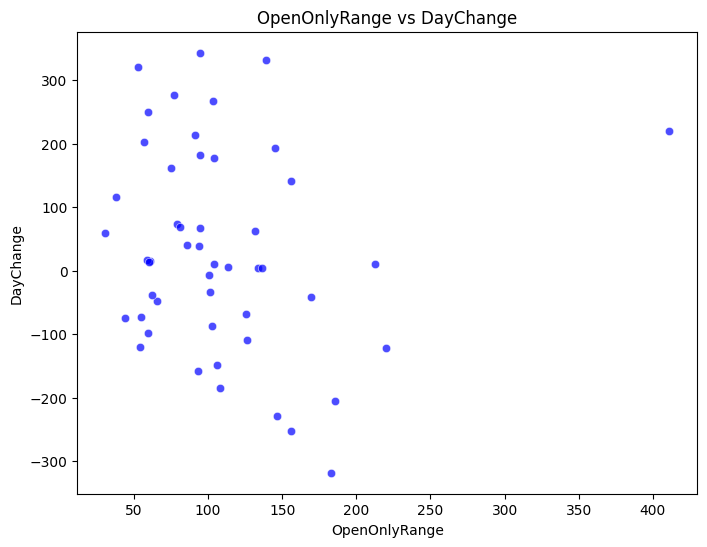

In [26]:
# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=Ddata, x='OpenOnlyRange', y='DayChange', color='blue', alpha=0.7)
plt.title('OpenOnlyRange vs DayChange')
plt.xlabel('OpenOnlyRange')
plt.ylabel('DayChange')
plt.show()


<Figure size 800x600 with 0 Axes>

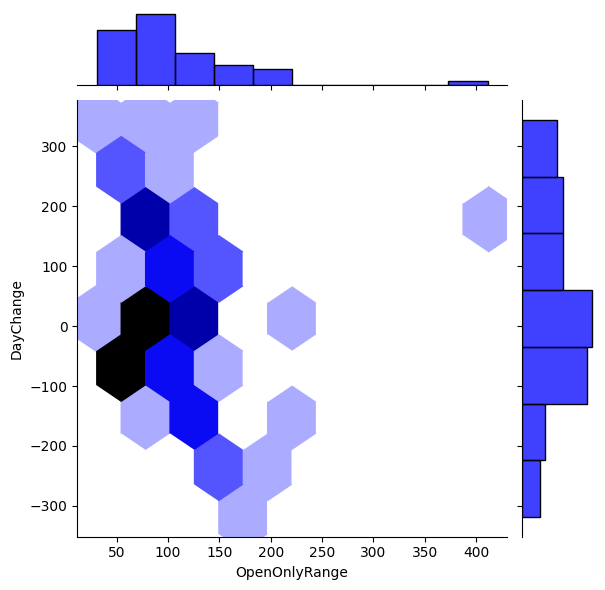

In [27]:
# Create joint plot
plt.figure(figsize=(8, 6))
sns.jointplot(data=Ddata, x='OpenOnlyRange', y='DayChange', kind='hex', color='blue')
plt.xlabel('OpenOnlyRange')
plt.ylabel('DayChange')
plt.show()


In [28]:
display(filtered_data)

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-01-05 09:30:00,16449.00,16494.25,16437.25,16464.50,16464.50,79867
2024-01-05 10:15:00,16540.75,16550.50,16511.50,16539.00,16539.00,45550
2024-01-08 09:30:00,16512.00,16578.25,16505.25,16576.50,16576.50,66361
2024-01-08 10:15:00,16625.50,16644.25,16623.00,16640.75,16640.75,29487
2024-01-09 09:30:00,16668.75,16714.50,16660.75,16675.75,16675.75,86515
...,...,...,...,...,...,...
2024-03-13 10:15:00,18328.00,18354.00,18323.50,18341.75,18341.75,50276
2024-03-14 09:30:00,18375.00,18398.00,18335.75,18363.25,18363.25,99755
2024-03-14 10:15:00,18309.00,18316.00,18272.75,18313.50,18313.50,59651


In [29]:
display(combined_data)

,Open,High,Low,Close,Volume,Range
2024-01-05,16449.00,16550.50,16437.25,16539.00,125417,113.25
2024-01-08,16512.00,16644.25,16505.25,16640.75,95848,139.00
2024-01-09,16668.75,16746.75,16660.75,16727.75,125766,86.00
2024-01-10,16840.00,16874.00,16836.00,16857.25,104437,38.00
2024-01-11,16984.50,17043.00,16830.50,16891.25,158242,212.50
2024-01-12,17008.25,17039.00,16935.25,16965.50,128503,103.75
2024-01-16,16917.00,17003.75,16870.25,16991.75,170724,133.50
2024-01-17,16825.00,16842.75,16716.50,16750.50,158732,126.25
2024-01-18,16996.50,17054.75,16995.50,17033.25,147142,59.25
2024-01-19,17190.50,17219.00,17166.25,17216.50,135135,52.75
